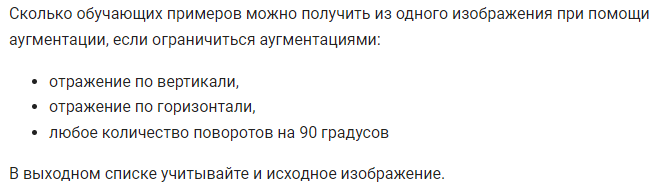

8

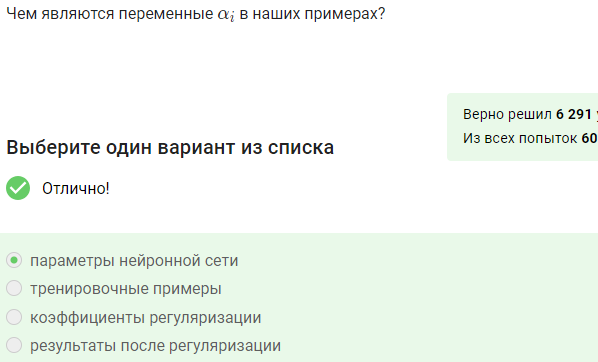

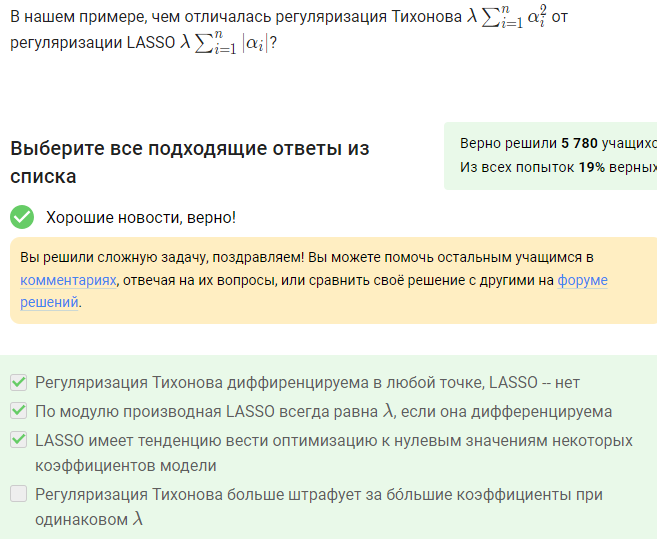

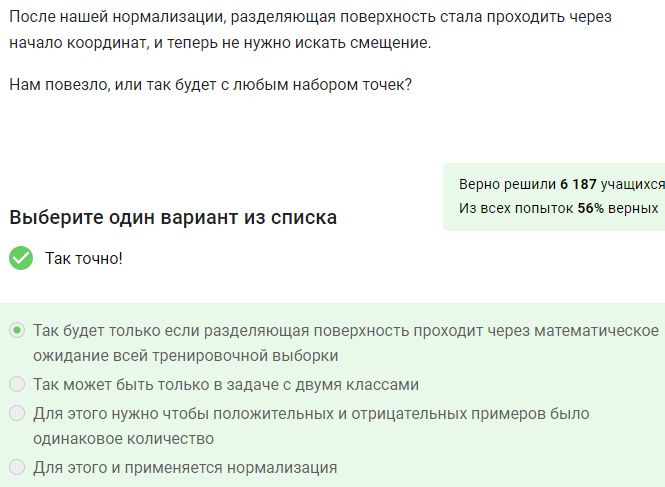

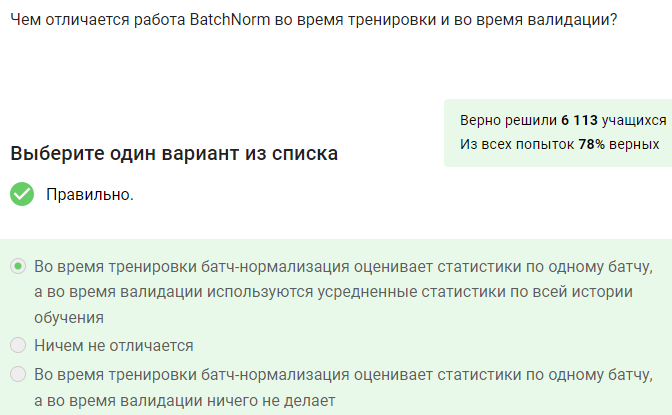

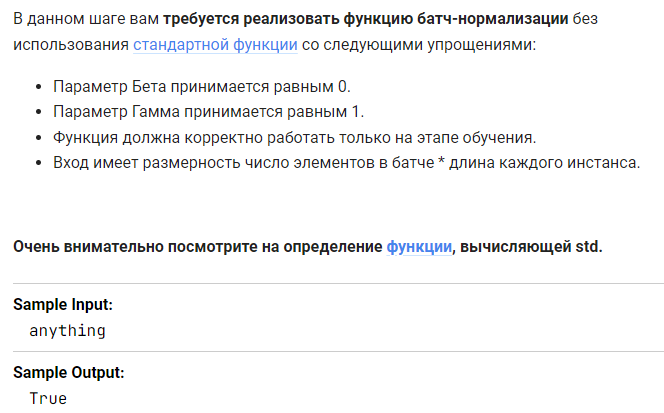

In [1]:
import numpy as np
import torch
import torch.nn as nn

def custom_batch_norm1d(input_tensor, eps):
    mean = torch.mean(input_tensor, dim=0)
    var = torch.var(input_tensor, dim=0, unbiased=False)
    normed_tensor = (input_tensor - mean) / torch.sqrt(var + eps)
    return normed_tensor


input_tensor = torch.Tensor([[0.0, 0, 1, 0, 2], [0, 1, 1, 0, 10]])
batch_norm = nn.BatchNorm1d(input_tensor.shape[1], affine=False)

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# import numpy as np
# all_correct = True
# for eps_power in range(10):
#     eps = np.power(10., -eps_power)
#     batch_norm.eps = eps
#     batch_norm_out = batch_norm(input_tensor)
#     custom_batch_norm_out = custom_batch_norm1d(input_tensor, eps)

#     all_correct &= torch.allclose(batch_norm_out, custom_batch_norm_out)
#     all_correct &= batch_norm_out.shape == custom_batch_norm_out.shape
# print(all_correct)

ModuleNotFoundError: No module named 'torch'

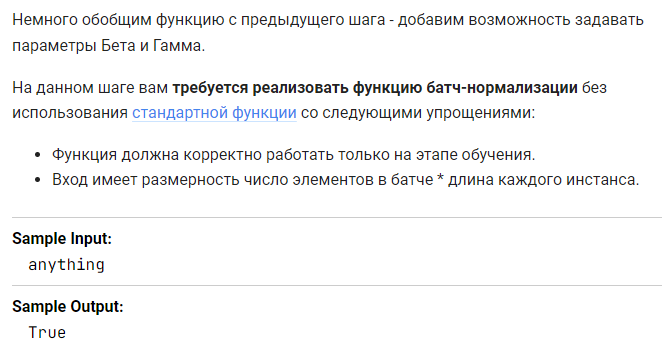

In [2]:
import torch
import torch.nn as nn

input_size = 7
batch_size = 5
input_tensor = torch.randn(batch_size, input_size, dtype=torch.float)

eps = 1e-3

def custom_batch_norm1d(input_tensor, weight, bias, eps):
    mean = input_tensor.mean(dim=0, keepdim=True)
    centered_tensor = input_tensor - mean
    variance = (centered_tensor ** 2).mean(dim=0, keepdim=True)
    std_dev = torch.sqrt(variance + eps)
    normed_tensor = centered_tensor / std_dev
    normed_tensor = normed_tensor * weight + bias
    return normed_tensor

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# batch_norm = nn.BatchNorm1d(input_size, eps=eps)
# batch_norm.bias.data = torch.randn(input_size, dtype=torch.float)
# batch_norm.weight.data = torch.randn(input_size, dtype=torch.float)
# batch_norm_out = batch_norm(input_tensor)
# custom_batch_norm_out = custom_batch_norm1d(input_tensor, batch_norm.weight.data, batch_norm.bias.data, eps)
# print(torch.allclose(batch_norm_out, custom_batch_norm_out, 1e-3) \
#       and batch_norm_out.shape == custom_batch_norm_out.shape)

ModuleNotFoundError: No module named 'torch'

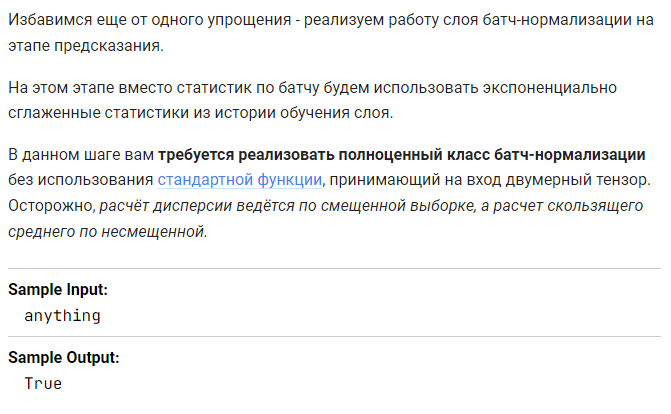

In [3]:
import torch
import torch.nn as nn

input_size = 3
batch_size = 5
eps = 1e-1

class CustomBatchNorm1d:
    def __init__(self, weight, bias, eps, momentum):
        self.weight = weight
        self.bias = bias
        self.eps = eps
        self.momentum = momentum
        self.running_mean = torch.zeros(input_size)
        self.running_var = torch.ones(input_size)
        self.training = True

    def __call__(self, input_tensor):
        if self.training:
            mean = input_tensor.mean(dim=0)
            var = input_tensor.var(dim=0, unbiased=True)
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * mean
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * var
        else:
            mean = self.running_mean
            var = self.running_var

        normed_tensor = (input_tensor - mean) / torch.sqrt(var + self.eps)
        normed_tensor = normed_tensor * self.weight + self.bias
        return normed_tensor

    def eval(self):
        self.training = False

batch_norm = nn.BatchNorm1d(input_size, eps=eps)
batch_norm.bias.data = torch.randn(input_size, dtype=torch.float)
batch_norm.weight.data = torch.randn(input_size, dtype=torch.float)
batch_norm.momentum = 0.5

custom_batch_norm1d = CustomBatchNorm1d(batch_norm.weight.data,
                                        batch_norm.bias.data, eps, batch_norm.momentum)

# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
all_correct = True

for i in range(8):
    torch_input = torch.randn(batch_size, input_size, dtype=torch.float)
    norm_output = batch_norm(torch_input)
    
    custom_output = custom_batch_norm1d(torch_input)
    all_correct &= torch.allclose(norm_output, custom_output, atol=1e-04) \
         and norm_output.shape == custom_output.shape

batch_norm.eval()
custom_batch_norm1d.eval()

for i in range(8):
    torch_input = torch.randn(batch_size, input_size, dtype=torch.float)
    norm_output = batch_norm(torch_input)
    custom_output = custom_batch_norm1d(torch_input)
    all_correct &= torch.allclose(norm_output, custom_output, atol=1e-04) \
        and norm_output.shape == custom_output.shape
#print(all_correct)

ModuleNotFoundError: No module named 'torch'

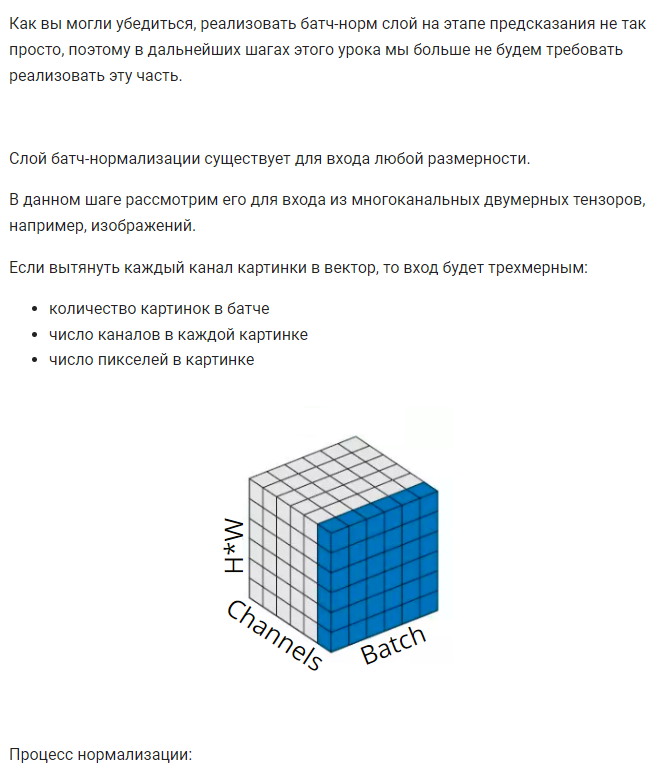

In [4]:
import torch
import torch.nn as nn

eps = 1e-3

input_channels = 3
batch_size = 3
height = 10
width = 10

batch_norm_2d = nn.BatchNorm2d(input_channels, affine=False, eps=eps)

input_tensor = torch.randn(batch_size, input_channels, height, width, dtype=torch.float)


def custom_batch_norm2d(input_tensor, eps):
    mean = input_tensor.mean(dim=(0, 2, 3), keepdim=True)
    var = ((input_tensor - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)
    normed_tensor = (input_tensor - mean) / torch.sqrt(var + eps)
    return normed_tensor



# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# norm_output = batch_norm_2d(input_tensor)
# custom_output = custom_batch_norm2d(input_tensor, eps)
# print(torch.allclose(norm_output, custom_output) and norm_output.shape == custom_output.shape)   без использования стандартной реализации со следующими упрощениями:

# Параметр Бета = 0.
# Параметр Гамма = 1.
# Функция должна корректно работать только на этапе обучения.


ModuleNotFoundError: No module named 'torch'

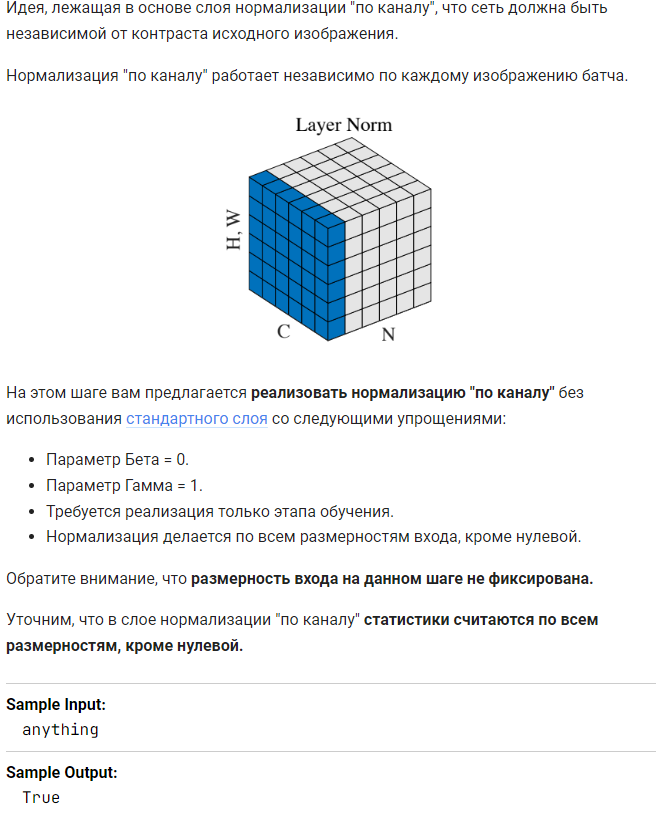

In [5]:
import torch
import torch.nn as nn

eps = 1e-10
def custom_layer_norm(input_tensor, eps):
    mean = torch.mean(input_tensor, dim=tuple(range(1, input_tensor.dim())), keepdim=True)
    squared_mean = torch.mean(input_tensor ** 2, dim=tuple(range(1, input_tensor.dim())), keepdim=True)
    var = squared_mean - mean ** 2
    std = torch.sqrt(var)
    normed_tensor = (input_tensor - mean) / (std + eps)
    return normed_tensor





# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# all_correct = True
# for dim_count in range(3, 9):
#     input_tensor = torch.randn(*list(range(3, dim_count + 2)), dtype=torch.float)
#     layer_norm = nn.LayerNorm(input_tensor.size()[1:], elementwise_affine=False, eps=eps)
# 
#     norm_output = layer_norm(input_tensor)
#     custom_output = custom_layer_norm(input_tensor, eps)

#     all_correct &= torch.allclose(norm_output, custom_output, 1e-2)
#     all_correct &= norm_output.shape == custom_output.shape
# print(all_correct)

ModuleNotFoundError: No module named 'torch'

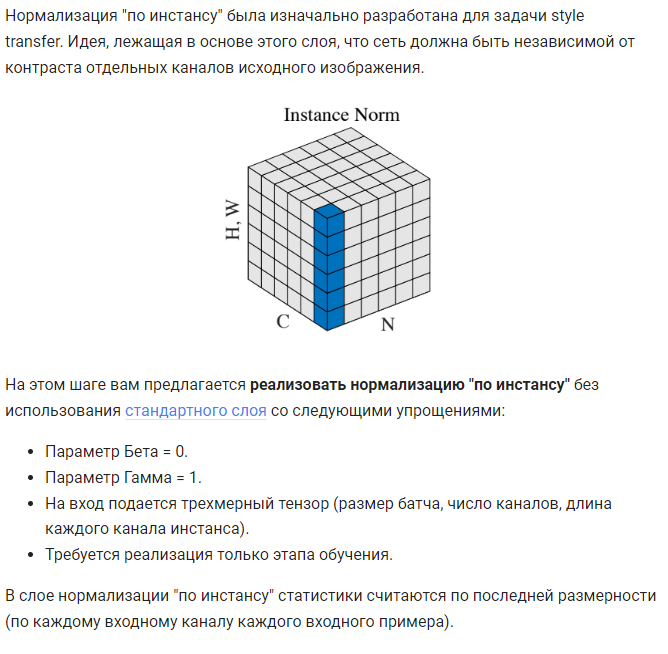

In [6]:
import torch
import torch.nn as nn

eps = 1e-3

batch_size = 5
input_channels = 2
input_length = 30

instance_norm = nn.InstanceNorm1d(input_channels, affine=False, eps=eps)

input_tensor = torch.randn(batch_size, input_channels, input_length, dtype=torch.float)


def custom_instance_norm1d(input_tensor, eps):
    # Нормирование тензора
    mean = torch.mean(input_tensor, dim=2, keepdim=True)
    var = torch.var(input_tensor, dim=2, keepdim=True, unbiased=False)
    normed_tensor = (input_tensor - mean) / torch.sqrt(var + eps)
    return normed_tensor


# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# norm_output = instance_norm(input_tensor)
# custom_output = custom_instance_norm1d(input_tensor, eps)
# print(torch.allclose(norm_output, custom_output, atol=1e-06) and norm_output.shape == custom_output.shape)


ModuleNotFoundError: No module named 'torch'

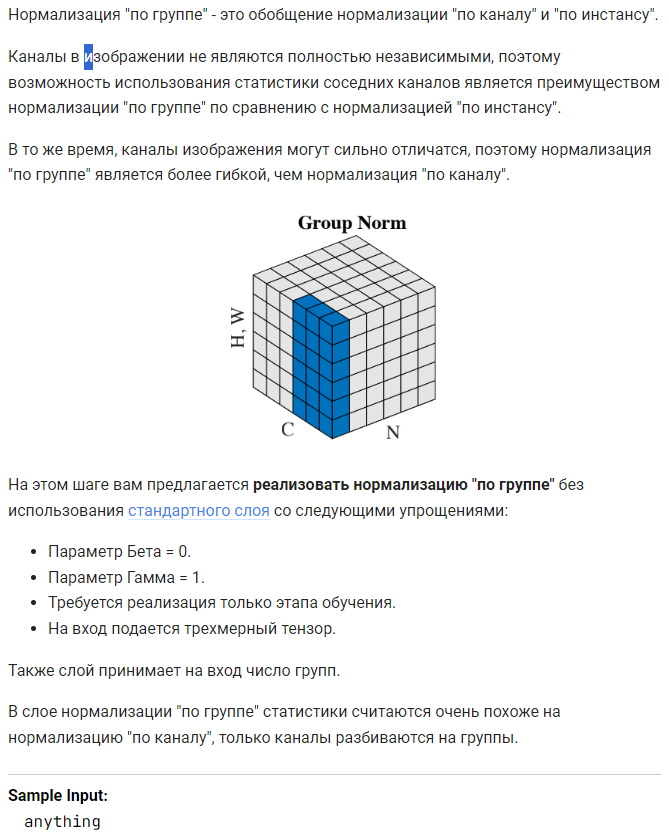

In [7]:
import torch
import torch.nn as nn

channel_count = 6
eps = 1e-3
batch_size = 20
input_size = 2

input_tensor = torch.randn(batch_size, channel_count, input_size)


def custom_group_norm(input_tensor, groups, eps):
    group_norm = nn.GroupNorm(groups, channel_count, eps=eps, affine=False)
    normed_tensor = group_norm(input_tensor)
    return normed_tensor



# Проверка происходит автоматически вызовом следующего кода
# (раскомментируйте для самостоятельной проверки,
#  в коде для сдачи задания должно быть закомментировано):
# all_correct = True
# for groups in [1, 2, 3, 6]:
#     group_norm = nn.GroupNorm(groups, channel_count, eps=eps, affine=False)
#     norm_output = group_norm(input_tensor)
#     custom_output = custom_group_norm(input_tensor, groups, eps)
#     all_correct &= torch.allclose(norm_output, custom_output, 1e-3)
#     all_correct &= norm_output.shape == custom_output.shape
# print(all_correct)

ModuleNotFoundError: No module named 'torch'

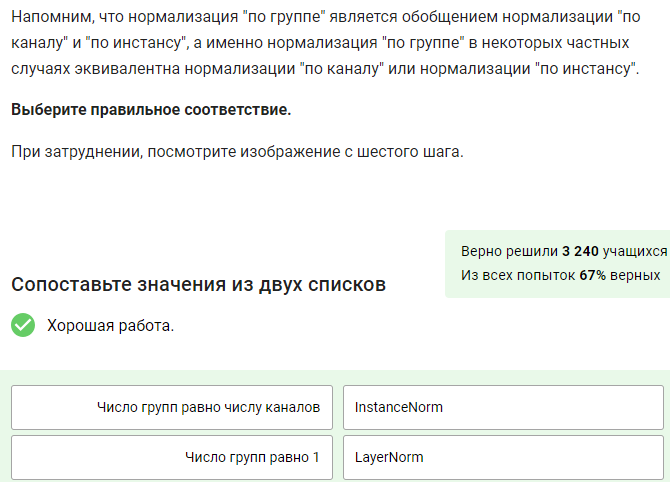

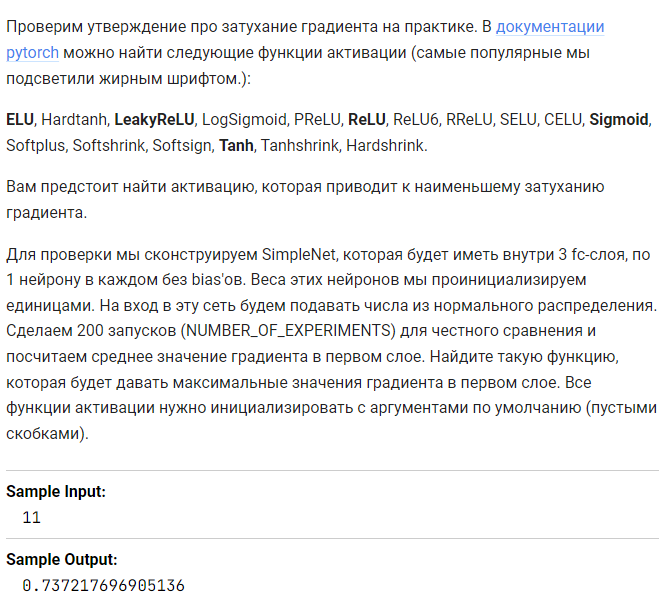

In [8]:
import torch
import numpy as np

seed = int(input())
np.random.seed(seed)
torch.manual_seed(seed)

NUMBER_OF_EXPERIMENTS = 200

class SimpleNet(torch.nn.Module):
    def __init__(self, activation):
        super().__init__()

        self.activation = activation
        self.fc1 = torch.nn.Linear(1, 1, bias=False)
        self.fc1.weight.data.fill_(1.)
        self.fc2 = torch.nn.Linear(1, 1, bias=False)
        self.fc2.weight.data.fill_(1.)
        self.fc3 = torch.nn.Linear(1, 1, bias=False)
        self.fc3.weight.data.fill_(1.)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        return x

    def get_fc1_grad_abs_value(self):
        return torch.abs(self.fc1.weight.grad)

def get_fc1_grad_abs_value(net, x):
    output = net.forward(x)
    output.backward()
    fc1_grad = net.get_fc1_grad_abs_value().item()
    net.zero_grad()
    return fc1_grad

activation = torch.nn.Hardshrink()  # Try different activations to get the largest gradient

net = SimpleNet(activation=activation)

fc1_grads = []
for x in torch.randn((NUMBER_OF_EXPERIMENTS, 1)):
    fc1_grads.append(get_fc1_grad_abs_value(net, x))

#print(np.mean(fc1_grads))


ModuleNotFoundError: No module named 'torch'

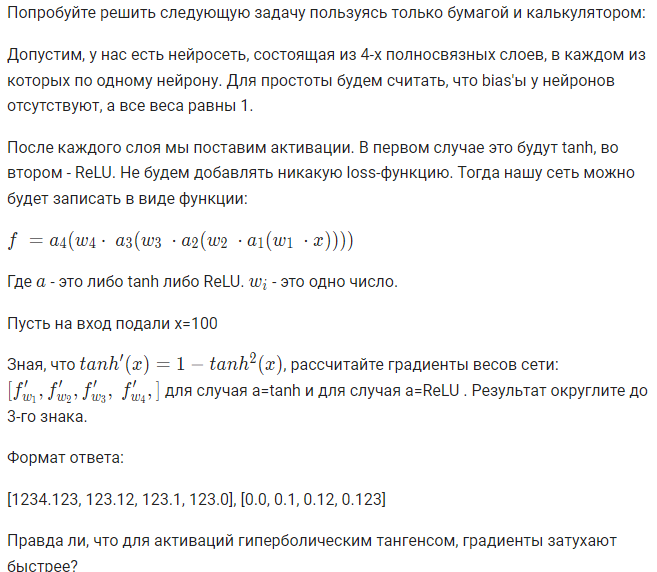

[0.0, 0.168, 0.304, 0.436],[100, 100, 100, 100]

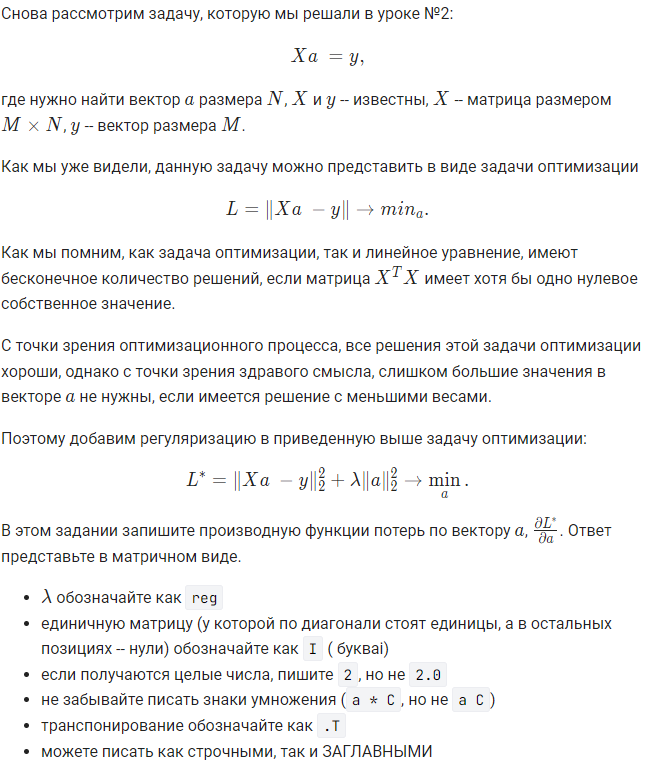

2*X.T*(X*a) - 2*X.T*y + 2*reg*a

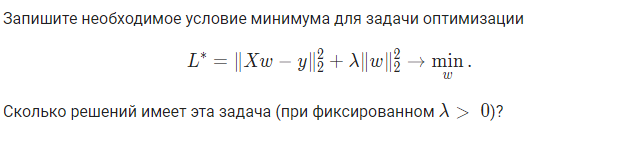

1

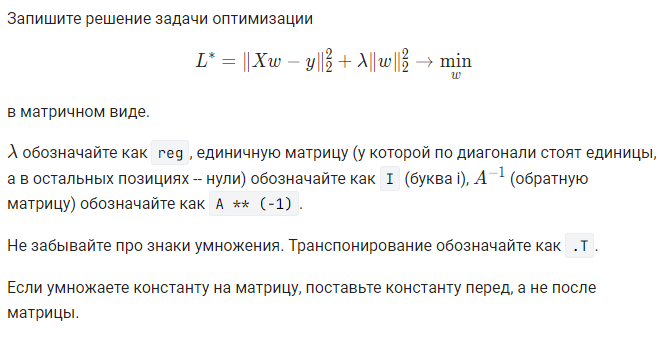

In [9]:
(X.T*X+reg*I)**(-1)*X.T*y

NameError: name 'X' is not defined

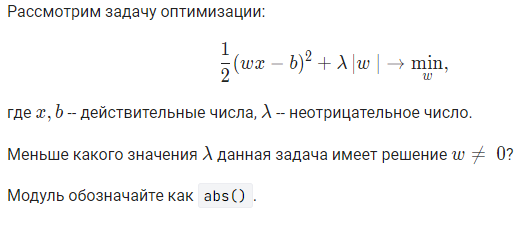

abs(b*x)